In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from nba_api.stats.endpoints import teamgamelogs
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
teamIDs = [team['id'] for team in nba_teams]
''''''

games14 = teamgamelogs.TeamGameLogs(season_nullable='2014-15')
games15 = teamgamelogs.TeamGameLogs(season_nullable='2015-16')
games16 = teamgamelogs.TeamGameLogs(season_nullable='2016-17')
games17 = teamgamelogs.TeamGameLogs(season_nullable='2017-18')
games18 = teamgamelogs.TeamGameLogs(season_nullable='2018-19')
games19 = teamgamelogs.TeamGameLogs(season_nullable='2019-20')
games20 = teamgamelogs.TeamGameLogs(season_nullable='2020-21')

games2014 = games14.get_data_frames()[0]
games2014 = games2014[games2014['TEAM_ID'].isin(teamIDs)]
games2015 = games15.get_data_frames()[0]
games2015 = games2015[games2015['TEAM_ID'].isin(teamIDs)]
games2016 = games16.get_data_frames()[0]
games2016 = games2016[games2016['TEAM_ID'].isin(teamIDs)]
games2017 = games17.get_data_frames()[0]
games2017 = games2017[games2017['TEAM_ID'].isin(teamIDs)]
games2018 = games18.get_data_frames()[0]
games2018 = games2018[games2018['TEAM_ID'].isin(teamIDs)]
games2019 = games19.get_data_frames()[0]
games2019 = games2019[games2019['TEAM_ID'].isin(teamIDs)]
games2020 = games20.get_data_frames()[0]
games2020 = games2020[games2020['TEAM_ID'].isin(teamIDs)]


In [2]:
''''''
def cleanColumns(df):
    return df.drop(columns=["GP_RANK","W_RANK","L_RANK","W_PCT_RANK",
                        "MIN_RANK","FGM_RANK","FGA_RANK","FG_PCT_RANK","FG3M_RANK",
                        "FG3A_RANK","FG3_PCT_RANK","FTM_RANK","FTA_RANK","FT_PCT_RANK",
                        "OREB_RANK","DREB_RANK","REB_RANK","AST_RANK","TOV_RANK",
                        "STL_RANK","BLK_RANK","BLKA_RANK","PF_RANK","PFD_RANK",
                        "PTS_RANK","PLUS_MINUS_RANK"])
games2014 = cleanColumns(games2014)
games2015 = cleanColumns(games2015)
games2016 = cleanColumns(games2016)
games2017 = cleanColumns(games2017)
games2018 = cleanColumns(games2018)
games2019 = cleanColumns(games2019)
games2020 = cleanColumns(games2020)



In [3]:
''''''
def applyPerMin(df):
    df['FGM'] = df.apply(lambda x: x['FGM']/x['MIN'], axis=1)
    df['FGA'] = df.apply(lambda x: x['FGA']/x['MIN'], axis=1)
    df['FG3M'] = df.apply(lambda x: x['FG3M']/x['MIN'], axis=1)
    df['FG3A'] = df.apply(lambda x: x['FG3A']/x['MIN'], axis=1)
    df['FTM'] = df.apply(lambda x: x['FTM']/x['MIN'], axis=1)
    df['FTA'] = df.apply(lambda x: x['FTA']/x['MIN'], axis=1)
    df['OREB'] = df.apply(lambda x: x['OREB']/x['MIN'], axis=1)
    df['DREB'] = df.apply(lambda x: x['DREB']/x['MIN'], axis=1)
    df['REB'] = df.apply(lambda x: x['REB']/x['MIN'], axis=1)
    df['AST'] = df.apply(lambda x: x['AST']/x['MIN'], axis=1)
    df['TOV'] = df.apply(lambda x: x['TOV']/x['MIN'], axis=1)
    df['STL'] = df.apply(lambda x: x['STL']/x['MIN'], axis=1)
    df['BLK'] = df.apply(lambda x: x['BLK']/x['MIN'], axis=1)
    df['BLKA'] = df.apply(lambda x: x['BLKA']/x['MIN'], axis=1)
    df['PF'] = df.apply(lambda x: x['PF']/x['MIN'], axis=1)
    df['PFD'] = df.apply(lambda x: x['PFD']/x['MIN'], axis=1)
    df['PTS'] = df.apply(lambda x: x['PTS']/x['MIN'], axis=1)
    

In [4]:
# standardize values so that they represent amount per minute (account for overtime)
''''''
applyPerMin(games2014)
applyPerMin(games2015)
applyPerMin(games2016)
applyPerMin(games2017)
applyPerMin(games2018)
applyPerMin(games2019)
applyPerMin(games2020)


In [6]:
''''''
games2014.to_csv(r'.\data\2014-15 full.csv')
games2015.to_csv(r'.\data\2015-16 full.csv')
games2016.to_csv(r'.\data\2016-17 full.csv')
games2017.to_csv(r'.\data\2017-18 full.csv')
games2018.to_csv(r'.\data\2018-19 full.csv')
games2019.to_csv(r'.\data\2019-20 full.csv')
games2020.to_csv(r'.\data\2020-21 full.csv')


In [7]:
games2014 = pd.read_csv(r'.\data\2014-15 full.csv', index_col=0)
games2015 = pd.read_csv(r'.\data\2015-16 full.csv', index_col=0)
games2016 = pd.read_csv(r'.\data\2016-17 full.csv', index_col=0)
games2017 = pd.read_csv(r'.\data\2017-18 full.csv', index_col=0)
games2018 = pd.read_csv(r'.\data\2018-19 full.csv', index_col=0)
games2019 = pd.read_csv(r'.\data\2019-20 full.csv', index_col=0)
games2020 = pd.read_csv(r'.\data\2020-21 full.csv', index_col=0)

In [8]:
team14 = []
team15 = []
team16 = []
team17 = []
team18 = []
team19 = []
team20 = []

for team in teamIDs:
    team14.append(games2014[games2014['TEAM_ID'] == team])
    team15.append(games2015[games2015['TEAM_ID'] == team])
    team16.append(games2016[games2016['TEAM_ID'] == team])
    team17.append(games2017[games2017['TEAM_ID'] == team])
    team18.append(games2018[games2018['TEAM_ID'] == team])
    team19.append(games2019[games2019['TEAM_ID'] == team])
    team20.append(games2020[games2020['TEAM_ID'] == team])

for i in range(len(team14)):
    g14 = team14[i]['GAME_ID'].tolist()
    wpct14 = []
    for gameid in g14:
        wgames14 = team14[i][(team14[i]['GAME_ID'] <= gameid) & (team14[i]['WL'] == 'W')]
        lgames14 = team14[i][(team14[i]['GAME_ID'] <= gameid) & (team14[i]['WL'] == 'L')]
        wpct14.append(len(wgames14)/(len(wgames14)+len(lgames14)))
    team14[i]['WPCT'] = wpct14
    
    g15 = team15[i]['GAME_ID'].tolist()
    wpct15 = []
    for gameid in g15:
        wgames15 = team15[i][(team15[i]['GAME_ID'] <= gameid) & (team15[i]['WL'] == 'W')]
        lgames15 = team15[i][(team15[i]['GAME_ID'] <= gameid) & (team15[i]['WL'] == 'L')]
        wpct15.append(len(wgames15)/(len(wgames15)+len(lgames15)))
    team15[i]['WPCT'] = wpct15
    
    g16 = team16[i]['GAME_ID'].tolist()
    wpct16 = []
    for gameid in g16:
        wgames16 = team16[i][(team16[i]['GAME_ID'] <= gameid) & (team16[i]['WL'] == 'W')]
        lgames16 = team16[i][(team16[i]['GAME_ID'] <= gameid) & (team16[i]['WL'] == 'L')]
        wpct16.append(len(wgames16)/(len(wgames16)+len(lgames16)))
    team16[i]['WPCT'] = wpct16
    
    g17 = team17[i]['GAME_ID'].tolist()
    wpct17 = []
    for gameid in g17:
        wgames17 = team17[i][(team17[i]['GAME_ID'] <= gameid) & (team17[i]['WL'] == 'W')]
        lgames17 = team17[i][(team17[i]['GAME_ID'] <= gameid) & (team17[i]['WL'] == 'L')]
        wpct17.append(len(wgames17)/(len(wgames17)+len(lgames17)))
    team17[i]['WPCT'] = wpct17
    
    g18 = team18[i]['GAME_ID'].tolist()
    wpct18 = []
    for gameid in g18:
        wgames18 = team18[i][(team18[i]['GAME_ID'] <= gameid) & (team18[i]['WL'] == 'W')]
        lgames18 = team18[i][(team18[i]['GAME_ID'] <= gameid) & (team18[i]['WL'] == 'L')]
        wpct18.append(len(wgames18)/(len(wgames18)+len(lgames18)))
    team18[i]['WPCT'] = wpct18
    
    g19 = team19[i]['GAME_ID'].tolist()
    wpct19 = []
    for gameid in g19:
        wgames19 = team19[i][(team19[i]['GAME_ID'] <= gameid) & (team19[i]['WL'] == 'W')]
        lgames19 = team19[i][(team19[i]['GAME_ID'] <= gameid) & (team19[i]['WL'] == 'L')]
        wpct19.append(len(wgames19)/(len(wgames19)+len(lgames19)))
    team19[i]['WPCT'] = wpct19
    
    g20 = team20[i]['GAME_ID'].tolist()
    wpct20 = []
    for gameid in g20:
        wgames20 = team20[i][(team20[i]['GAME_ID'] <= gameid) & (team20[i]['WL'] == 'W')]
        lgames20 = team20[i][(team20[i]['GAME_ID'] <= gameid) & (team20[i]['WL'] == 'L')]
        wpct20.append(len(wgames20)/(len(wgames20)+len(lgames20)))
    team20[i]['WPCT'] = wpct20
    
games2014 = pd.concat(team14)
games2015 = pd.concat(team15)
games2016 = pd.concat(team16)
games2017 = pd.concat(team17)
games2018 = pd.concat(team18)
games2019 = pd.concat(team19)
games2020 = pd.concat(team20)


C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [9]:
gamesH2014 = games2014[games2014['MATCHUP'].str.contains('vs.')]
gamesH2014join = gamesH2014.add_suffix('-')
gamesH2015 = games2015[games2015['MATCHUP'].str.contains('vs.')]
gamesH2015join = gamesH2015.add_suffix('-')
gamesH2016 = games2016[games2016['MATCHUP'].str.contains('vs.')]
gamesH2016join = gamesH2016.add_suffix('-')
gamesH2017 = games2017[games2017['MATCHUP'].str.contains('vs.')]
gamesH2017join = gamesH2017.add_suffix('-')
gamesH2018 = games2018[games2018['MATCHUP'].str.contains('vs.')]
gamesH2018join = gamesH2018.add_suffix('-')
gamesH2019 = games2019[games2019['MATCHUP'].str.contains('vs.')]
gamesH2019join = gamesH2019.add_suffix('-')
gamesH2020 = games2020[games2020['MATCHUP'].str.contains('vs.')]
gamesH2020join = gamesH2020.add_suffix('-')

gamesA2014 = games2014[games2014['MATCHUP'].str.contains('@')]
gamesA2014join = gamesA2014.add_suffix('-')
gamesA2015 = games2015[games2015['MATCHUP'].str.contains('@')]
gamesA2015join = gamesA2015.add_suffix('-')
gamesA2016 = games2016[games2016['MATCHUP'].str.contains('@')]
gamesA2016join = gamesA2016.add_suffix('-')
gamesA2017 = games2017[games2017['MATCHUP'].str.contains('@')]
gamesA2017join = gamesA2017.add_suffix('-')
gamesA2018 = games2018[games2018['MATCHUP'].str.contains('@')]
gamesA2018join = gamesA2018.add_suffix('-')
gamesA2019 = games2019[games2019['MATCHUP'].str.contains('@')]
gamesA2019join = gamesA2019.add_suffix('-')
gamesA2020 = games2020[games2020['MATCHUP'].str.contains('@')]
gamesA2020join = gamesA2020.add_suffix('-')


In [10]:
gamesH2014 = pd.merge(gamesH2014, gamesA2014join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesH2015 = pd.merge(gamesH2015, gamesA2015join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesH2016 = pd.merge(gamesH2016, gamesA2016join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesH2017 = pd.merge(gamesH2017, gamesA2017join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesH2018 = pd.merge(gamesH2018, gamesA2018join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesH2019 = pd.merge(gamesH2019, gamesA2019join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesH2020 = pd.merge(gamesH2020, gamesA2020join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')

gamesA2014 = pd.merge(gamesA2014, gamesH2014join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesA2015 = pd.merge(gamesA2015, gamesH2015join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesA2016 = pd.merge(gamesA2016, gamesH2016join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesA2017 = pd.merge(gamesA2017, gamesH2017join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesA2018 = pd.merge(gamesA2018, gamesH2018join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesA2019 = pd.merge(gamesA2019, gamesH2019join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')
gamesA2020 = pd.merge(gamesA2020, gamesH2020join, how="outer", left_on='GAME_ID', right_on='GAME_ID-')

In [11]:
gamesH2014.to_csv(r'.\data\2014-15 home.csv')
gamesH2015.to_csv(r'.\data\2015-16 home.csv')
gamesH2016.to_csv(r'.\data\2016-17 home.csv')
gamesH2017.to_csv(r'.\data\2017-18 home.csv')
gamesH2018.to_csv(r'.\data\2018-19 home.csv')
gamesH2019.to_csv(r'.\data\2019-20 home.csv')
gamesH2020.to_csv(r'.\data\2020-21 home.csv')
gamesA2014.to_csv(r'.\data\2014-15 away.csv')
gamesA2015.to_csv(r'.\data\2015-16 away.csv')
gamesA2016.to_csv(r'.\data\2016-17 away.csv')
gamesA2017.to_csv(r'.\data\2017-18 away.csv')
gamesA2018.to_csv(r'.\data\2018-19 away.csv')
gamesA2019.to_csv(r'.\data\2019-20 away.csv')
gamesA2020.to_csv(r'.\data\2020-21 away.csv')

In [12]:
games2014 = pd.concat([gamesH2014, gamesA2014]).sort_values(by='GAME_DATE')
games2015 = pd.concat([gamesH2015, gamesA2015]).sort_values(by='GAME_DATE')
games2016 = pd.concat([gamesH2016, gamesA2016]).sort_values(by='GAME_DATE')
games2017 = pd.concat([gamesH2017, gamesA2017]).sort_values(by='GAME_DATE')
games2018 = pd.concat([gamesH2018, gamesA2018]).sort_values(by='GAME_DATE')
games2019 = pd.concat([gamesH2019, gamesA2019]).sort_values(by='GAME_DATE')
games2020 = pd.concat([gamesH2020, gamesA2020]).sort_values(by='GAME_DATE')

In [13]:

games2014.to_csv(r'.\data\2014-15.csv')
games2015.to_csv(r'.\data\2015-16.csv')
games2016.to_csv(r'.\data\2016-17.csv')
games2017.to_csv(r'.\data\2017-18.csv')
games2018.to_csv(r'.\data\2018-19.csv')
games2019.to_csv(r'.\data\2019-20.csv')
games2020.to_csv(r'.\data\2020-21.csv')


In [15]:
# begin normalization of data 



m = [[[{},{},{}],[{},{},{}]],
     [[{},{},{}],[{},{},{}]],
     [[{},{},{}],[{},{},{}]],
     [[{},{},{}],[{},{},{}]],
     [[{},{},{}],[{},{},{}]],
     [[{},{},{}],[{},{},{}]],
     [[{},{},{}],[{},{},{}]]]


def generateDist(m, s, df):
    m['FGM'] = df['FGM'].mean()#df['FGM'].mean()
    m['FGA'] = df['FGA'].mean()
    m['FG_PCT'] = df['FG_PCT'].mean()
    m['FG3M'] = df['FG3M'].mean()
    m['FG3A'] = df['FG3A'].mean()
    m['FG3_PCT'] = df['FG3_PCT'].mean()
    m['FTM'] = df['FTM'].mean()
    m['FTA'] = df['FTA'].mean()
    m['FT_PCT'] = df['FT_PCT'].mean()
    m['OREB'] = df['OREB'].mean()
    m['DREB'] = df['DREB'].mean()
    m['REB'] = df['REB'].mean()
    m['AST'] = df['AST'].mean()
    m['TOV'] = df['TOV'].mean()
    m['STL'] = df['STL'].mean()
    m['BLK'] = df['BLK'].mean()
    m['BLKA'] = df['BLKA'].mean()
    m['PF'] = df['PF'].mean()
    m['PFD'] = df['PFD'].mean()
    m['PTS'] = df['PTS'].mean()
    m['FGM-'] = df['FGM-'].mean()#df['FGM'].mean()
    m['FGA-'] = df['FGA-'].mean()
    m['FG_PCT-'] = df['FG_PCT-'].mean()
    m['FG3M-'] = df['FG3M-'].mean()
    m['FG3A-'] = df['FG3A-'].mean()
    m['FG3_PCT-'] = df['FG3_PCT-'].mean()
    m['FTM-'] = df['FTM-'].mean()
    m['FTA-'] = df['FTA-'].mean()
    m['FT_PCT-'] = df['FT_PCT-'].mean()
    m['OREB-'] = df['OREB-'].mean()
    m['DREB-'] = df['DREB-'].mean()
    m['REB-'] = df['REB-'].mean()
    m['AST-'] = df['AST-'].mean()
    m['TOV-'] = df['TOV-'].mean()
    m['STL-'] = df['STL-'].mean()
    m['BLK-'] = df['BLK-'].mean()
    m['BLKA-'] = df['BLKA-'].mean()
    m['PF-'] = df['PF-'].mean()
    m['PFD-'] = df['PFD-'].mean()
    m['PTS-'] = df['PTS-'].mean()
    
    s['FGM'] = df['FGM'].std()
    s['FGA'] = df['FGA'].std()
    s['FG_PCT'] = df['FG_PCT'].mean()
    s['FG3M'] = df['FG3M'].std()
    s['FG3A'] = df['FG3A'].std()
    s['FG3_PCT'] = df['FG3_PCT'].mean()
    s['FTM'] = df['FTM'].std()
    s['FTA'] = df['FTA'].std()
    s['FT_PCT'] = df['FT_PCT'].mean()
    s['OREB'] = df['OREB'].std()
    s['DREB'] = df['DREB'].std()
    s['REB'] = df['REB'].std()
    s['AST'] = df['AST'].std()
    s['TOV'] = df['TOV'].std()
    s['STL'] = df['STL'].std()
    s['BLK'] = df['BLK'].std()
    s['BLKA'] = df['BLKA'].std()
    s['PF'] = df['PF'].std()
    s['PFD'] = df['PFD'].std()
    s['PTS'] = df['PTS'].std()
    s['FGM-'] = df['FGM-'].std()
    s['FGA-'] = df['FGA-'].std()
    s['FG_PCT-'] = df['FG_PCT-'].mean()
    s['FG3M-'] = df['FG3M-'].std()
    s['FG3A-'] = df['FG3A-'].std()
    s['FG3_PCT-'] = df['FG3_PCT-'].mean()
    s['FTM-'] = df['FTM-'].std()
    s['FTA-'] = df['FTA-'].std()
    s['FT_PCT-'] = df['FT_PCT-'].mean()
    s['OREB-'] = df['OREB-'].std()
    s['DREB-'] = df['DREB-'].std()
    s['REB-'] = df['REB-'].std()
    s['AST-'] = df['AST-'].std()
    s['TOV-'] = df['TOV-'].std()
    s['STL-'] = df['STL-'].std()
    s['BLK-'] = df['BLK-'].std()
    s['BLKA-'] = df['BLKA-'].std()
    s['PF-'] = df['PF-'].std()
    s['PFD-'] = df['PFD-'].std()
    s['PTS-'] = df['PTS-'].std()

generateDist(m[0][0][0], m[0][1][0], games2014)
generateDist(m[1][0][0], m[1][1][0], games2015)
generateDist(m[2][0][0], m[2][1][0], games2016)
generateDist(m[3][0][0], m[3][1][0], games2017)
generateDist(m[4][0][0], m[4][1][0], games2018)
generateDist(m[5][0][0], m[5][1][0], games2019)
generateDist(m[6][0][0], m[6][1][0], games2020)
generateDist(m[0][0][1], m[0][1][1], games2014[games2014['WL']=='W'])
generateDist(m[1][0][1], m[1][1][1], games2015[games2015['WL']=='W'])
generateDist(m[2][0][1], m[2][1][1], games2016[games2016['WL']=='W'])
generateDist(m[3][0][1], m[3][1][1], games2017[games2017['WL']=='W'])
generateDist(m[4][0][1], m[4][1][1], games2018[games2018['WL']=='W'])
generateDist(m[5][0][1], m[5][1][1], games2019[games2019['WL']=='W'])
generateDist(m[6][0][1], m[6][1][1], games2020[games2020['WL']=='W'])
generateDist(m[0][0][2], m[0][1][2], games2014[games2014['WL']=='L'])
generateDist(m[1][0][2], m[1][1][2], games2015[games2015['WL']=='L'])
generateDist(m[2][0][2], m[2][1][2], games2016[games2016['WL']=='L'])
generateDist(m[3][0][2], m[3][1][2], games2017[games2017['WL']=='L'])
generateDist(m[4][0][2], m[4][1][2], games2018[games2018['WL']=='L'])
generateDist(m[5][0][2], m[5][1][2], games2019[games2019['WL']=='L'])
generateDist(m[6][0][2], m[6][1][2], games2020[games2020['WL']=='L'])

print(m[0])

[[{'FGM': 0.7754548630343547, 'FGA': 1.7268088884619464, 'FG_PCT': 0.4500878048780483, 'FG3M': 0.16219393100904278, 'FG3A': 0.4632036083233776, 'FG3_PCT': 0.3477536585365845, 'FTM': 0.3540889122323007, 'FTA': 0.4720333457197607, 'FT_PCT': 0.7504951219512168, 'OREB': 0.22488458723408242, 'DREB': 0.669643241791729, 'REB': 0.8945278290258121, 'AST': 0.45558354492694597, 'TOV': 0.2967334392445375, 'STL': 0.15997470957278412, 'BLK': 0.09904401058990317, 'BLKA': 0.09904401058990316, 'PF': 0.41764120213467215, 'PFD': 0.4176412021346723, 'PTS': 2.067192569310056, 'FGM-': 0.775454863034355, 'FGA-': 1.7268088884619455, 'FG_PCT-': 0.4500878048780483, 'FG3M-': 0.16219393100904275, 'FG3A-': 0.4632036083233777, 'FG3_PCT-': 0.3477536585365846, 'FTM-': 0.35408891223230066, 'FTA-': 0.4720333457197607, 'FT_PCT-': 0.750495121951217, 'OREB-': 0.22488458723408233, 'DREB-': 0.6696432417917288, 'REB-': 0.8945278290258123, 'AST-': 0.45558354492694597, 'TOV-': 0.2967334392445375, 'STL-': 0.1599747095727842, 'B

In [11]:
games2014 = pd.read_csv(r'.\data\2014-15.csv', index_col=0)
games2015 = pd.read_csv(r'.\data\2015-16.csv', index_col=0)
games2016 = pd.read_csv(r'.\data\2016-17.csv', index_col=0)
games2017 = pd.read_csv(r'.\data\2017-18.csv', index_col=0)
games2018 = pd.read_csv(r'.\data\2018-19.csv', index_col=0)
games2019 = pd.read_csv(r'.\data\2019-20.csv', index_col=0)
games2020 = pd.read_csv(r'.\data\2020-21.csv', index_col=0)

In [14]:
games2014 = games2014[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()
games2015 = games2015[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()
games2016 = games2016[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()
games2017 = games2017[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()
games2018 = games2018[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()
games2019 = games2019[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()
games2020 = games2020[['WL','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-','PTS-']].copy()

def GaussianDist(mean, sig, x):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mean)/sig)**2)


In [18]:
def naiveBayes(predict):
    wProb = 1 
    lProb = 1
    for key in predict:
        if key != 'WL':
            wProb *= GaussianDist(m[0][0][1][key], m[0][1][1][key], predict[key])
            lProb *= GaussianDist(m[0][0][2][key], m[0][1][2][key], predict[key])
    return wProb, lProb

In [19]:
tests = []
wct = 0
lct = 0

for row_dict in games2018.to_dict(orient="records"):
    w,l = naiveBayes(row_dict)
    if (w > l):
        if row_dict['WL']=='W': 
            wct += 1
        else:
            lct += 1
    else: 
        if row_dict['WL']=='L': 
            wct += 1
        else:
            lct += 1
print("tp + tn: " + str(wct) + ",  fp + fn: " + str(lct))

tp + tn: 2234,  fp + fn: 226


In [20]:
from sklearn import linear_model

'''games2017 = pd.get_dummies(games2017, drop_first=True, columns=['WL'])
games2017.rename({'WL_W': 'WL'}, axis=1, inplace=True)
games2018 = pd.get_dummies(games2018, drop_first=True, columns=['WL'])
games2018.rename({'WL_W': 'WL'}, axis=1, inplace=True)
games2019 = pd.get_dummies(games2019, drop_first=True, columns=['WL'])
games2019.rename({'WL_W': 'WL'}, axis=1, inplace=True)
games2020 = pd.get_dummies(games2020, drop_first=True, columns=['WL'])
games2020.rename({'WL_W': 'WL'}, axis=1, inplace=True)
'''
gamesr2014 = games2014.drop(columns=['WL','PTS','PTS-'])
gamesr2015 = games2015.drop(columns=['WL','PTS','PTS-'])
gamesr2016 = games2016.drop(columns=['WL','PTS','PTS-'])
gamesr2017 = games2017.drop(columns=['WL','PTS','PTS-'])
gamesr2018 = games2018.drop(columns=['WL','PTS','PTS-'])
gamesr2019 = games2019.drop(columns=['WL','PTS','PTS-'])
gamesr2020 = games2020.drop(columns=['WL','PTS','PTS-'])



games2018.head()

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,DREB-,REB-,AST-,TOV-,STL-,BLK-,BLKA-,PF-,PFD-,PTS-
81,W,0.875000,2.020833,0.433,0.229167,0.770833,0.297,0.208333,0.291667,0.714,...,0.854167,0.979167,0.375000,0.333333,0.166667,0.104167,0.104167,0.416667,0.416667,1.812500
327,W,0.875000,1.979167,0.442,0.145833,0.541667,0.269,0.354167,0.375000,0.944,...,0.604167,0.937500,0.437500,0.312500,0.250000,0.125000,0.145833,0.437500,0.604167,2.083333
983,L,0.687500,1.895833,0.363,0.208333,0.770833,0.270,0.500000,0.770833,0.649,...,0.854167,1.208333,0.583333,0.437500,0.145833,0.145833,0.125000,0.604167,0.437500,2.250000
778,L,0.708333,1.812500,0.391,0.104167,0.541667,0.192,0.291667,0.479167,0.609,...,0.895833,1.145833,0.437500,0.312500,0.145833,0.104167,0.104167,0.416667,0.416667,2.187500
40,L,0.854167,1.875000,0.456,0.208333,0.750000,0.278,0.312500,0.375000,0.833,...,0.750000,0.958333,0.437500,0.333333,0.250000,0.125000,0.062500,0.479167,0.625000,2.625000


In [27]:
reg = linear_model.LinearRegression()

x=gamesr2017[gamesr2017.columns.tolist()].values
y=games2017['PTS']
reg.fit(x, y)

LinearRegression()

In [28]:
pred = reg.predict([gamesr2018.iloc[1621].tolist()])
print(pred*48)

[117.]


Text(0.5, 1, 'Correlation Matrix')

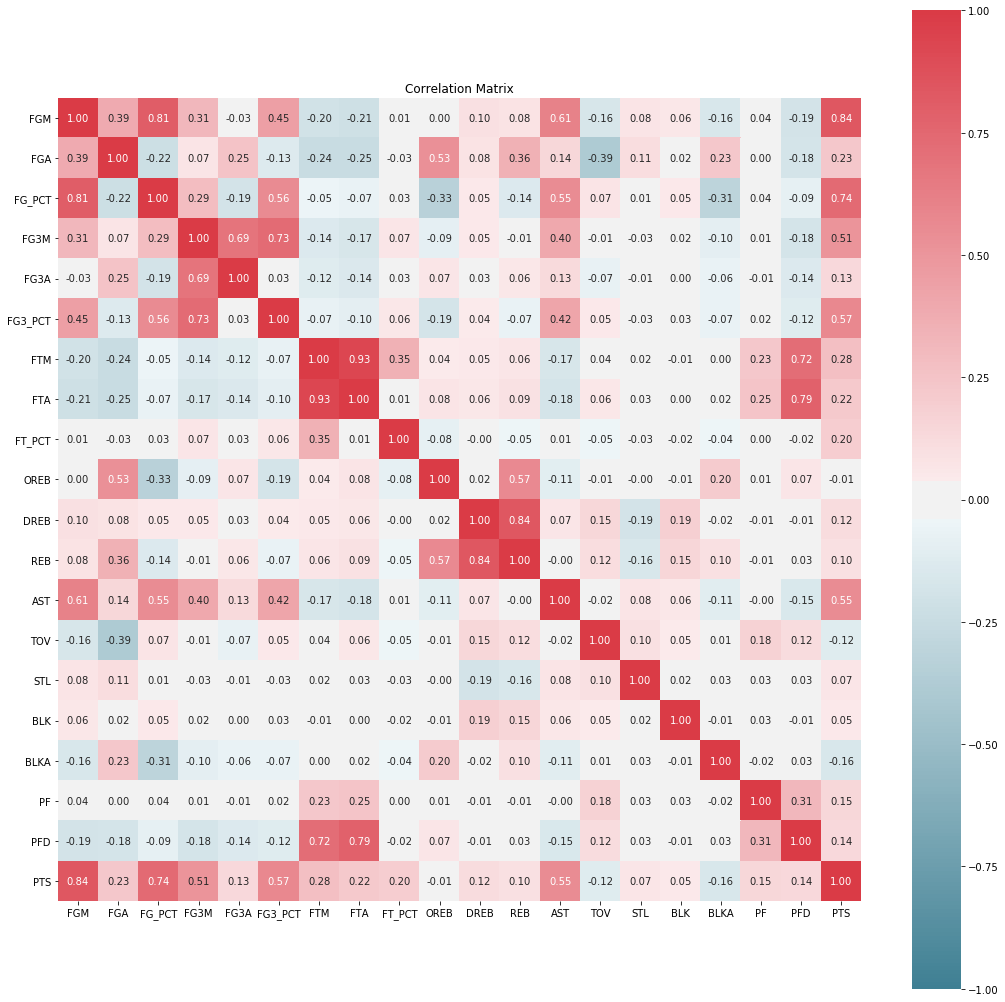

In [31]:
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import seaborn as sns

f, ax = plt.subplots(figsize=(18, 18))
corr = pd.concat([games2018,games2019,games2020])[['FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','PTS']].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmax=1,vmin=-1, annot=True,square=True,fmt='.2f', ax=ax)

ax.set_title("Correlation Matrix")

In [30]:
preds = np.array([])
for i in range(len(gamesr2018)):
    preds = np.append(preds, reg.predict([gamesr2018.iloc[i].tolist()]))
    

In [31]:
games2014 = pd.read_csv(r'.\data\2014-15.csv', index_col=0)
games2015 = pd.read_csv(r'.\data\2015-16.csv', index_col=0)
games2016 = pd.read_csv(r'.\data\2016-17.csv', index_col=0)
games2017 = pd.read_csv(r'.\data\2017-18.csv', index_col=0)
games2018 = pd.read_csv(r'.\data\2018-19.csv', index_col=0)
games2019 = pd.read_csv(r'.\data\2019-20.csv', index_col=0)
games2020 = pd.read_csv(r'.\data\2020-21.csv', index_col=0)

def prediction(team, date):
    teamGames = [games2014[games2014['TEAM_ABBREVIATION']==team],
                 games2015[games2015['TEAM_ABBREVIATION']==team],
                 games2016[games2016['TEAM_ABBREVIATION']==team],
                 games2017[games2017['TEAM_ABBREVIATION']==team],
                 games2018[games2018['TEAM_ABBREVIATION']==team],
                 games2019[games2019['TEAM_ABBREVIATION']==team],
                 games2020[games2020['TEAM_ABBREVIATION']==team]]
    for i in range(len(teamGames)):
        teamGames[i]['GAME_DATE'] = teamGames[i]['GAME_DATE'].apply(lambda x: x[:10])
        teamGames[i] = teamGames[i][teamGames[i]['GAME_DATE'] < date]
    
    # predict for 2018
    w0 = 0
    w1 = 0
    if (len(teamGames[1]) < 5):
        w0 = 0.2*(5-len(teamGames[1]))
        w1 = 0.2*len(teamGames[1])
    else: 
        w1 = 1
        teamGames[1] = teamGames[1][-5:]
    avs = teamGames[1][['FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','FTM','FTA','FT_PCT','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','FGM-','FGA-','FG_PCT-','FG3M-','FG3A-','FG3_PCT-','FTM-','FTA-','FT_PCT-','OREB-','DREB-','REB-','AST-','TOV-','STL-','BLK-','BLKA-','PF-','PFD-']].mean()
    for i, v in avs.items():
        avs = avs.replace(v, w1*v + w0*m[3][0][0][i])
    return avs

In [32]:
print(reg.predict([prediction('DEN', '2018-11-30').tolist()])*48)

[98.6]


C:\Users\Kyle\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
